<a href="https://colab.research.google.com/github/AlecTraas/computational-geo-lab/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


array([[0.11305718, 0.91450554],
       [9.66859421, 0.04837926],
       [7.38633449, 7.87057934],
       [5.11477063, 7.6637667 ],
       [8.53227396, 4.30930932],
       [7.38633449, 7.87057934],
       [8.34794772, 2.71000672],
       [8.53227396, 4.30930932],
       [0.86581323, 1.59465754],
       [5.11477063, 7.6637667 ]])

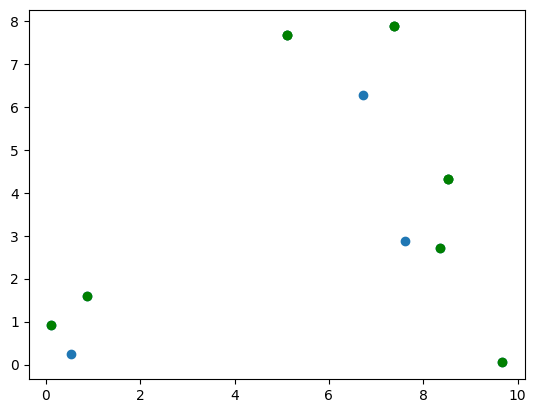

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def RP():
    npoints=10
    ppoints=np.random.rand(npoints,2)*10
    sort=sorted(ppoints, key=lambda x: x[0])
    left=sort[0]
    right=sort[len(sort)-1]
    hull=[]
    hull=hull+[left,right]
    sort.pop(0)
    sort.pop(-1)

    PS= lambda l,r,ps: (
        np.array([p for p in ps if aline(l,r,p)]),
        np.array([p for p in ps if not aline(l,r,p)])
    )
    upper,lower=PS(left,right,sort)
    hull+=list(quickHull(upper,left,right,1))
    hull+=list(quickHull(upper,left,right,-1))

    hull=np.vstack([arr for arr in hull if len(arr)>0])

    plt.scatter(ppoints[:,0],ppoints[:,1])
    plt.scatter(hull[:,0], hull[:,1], color="green")
    #plt.plot(hull, linestyle="dotted")
    #plt.show()

    return hull

def aline(a,b,c):
    return (b[0]-a[0])*(c[1]-a[1])-(b[1]-a[1])*(c[0]-a[0])>0

def MaxDist(ppoints,a,b):
    d=0.5*np.abs(a[0]*(b[1]-ppoints[:,1])+b[0]*(ppoints[:,1]-a[1])+(ppoints[:,0]*(a[1]-b[1])))
    return ppoints[np.argmax(d)]

def quickHull(ppoints,a,b,f):
    if ppoints.size==0 or a is None or b is None:
        return [[]]
    c= MaxDist(ppoints,a,b)
    hull=[]
    hull=hull+[c]
    indices=np.where((ppoints==c).all(axis=1))[0]
    ppoints=np.delete(ppoints,indices,axis=0)

    PS=lambda l,r,ps: (
        np.array([p for p in ps if aline(l,r,p)]),
        np.array([p for p in ps if not aline(l,r,p)])
    )

    set1, set2=PS(a,c,ppoints)
    set3,set4=PS(b,c,ppoints)

    if f==1:
        hull=hull+quickHull(set1,a,c,1)
        hull=hull+quickHull(set4,c,b,1)
    else:
        hull=hull+quickHull(set2,a,c,-1)
        hull=hull+quickHull(set3,c,b,-1)

    return hull

RP()

